In [125]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [317]:
import PIL
import cv2
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.image import resize
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, TruePositives, FalsePositives, FalseNegatives
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA

In [127]:
img_path = PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1002_bacteria_2933.jpeg")

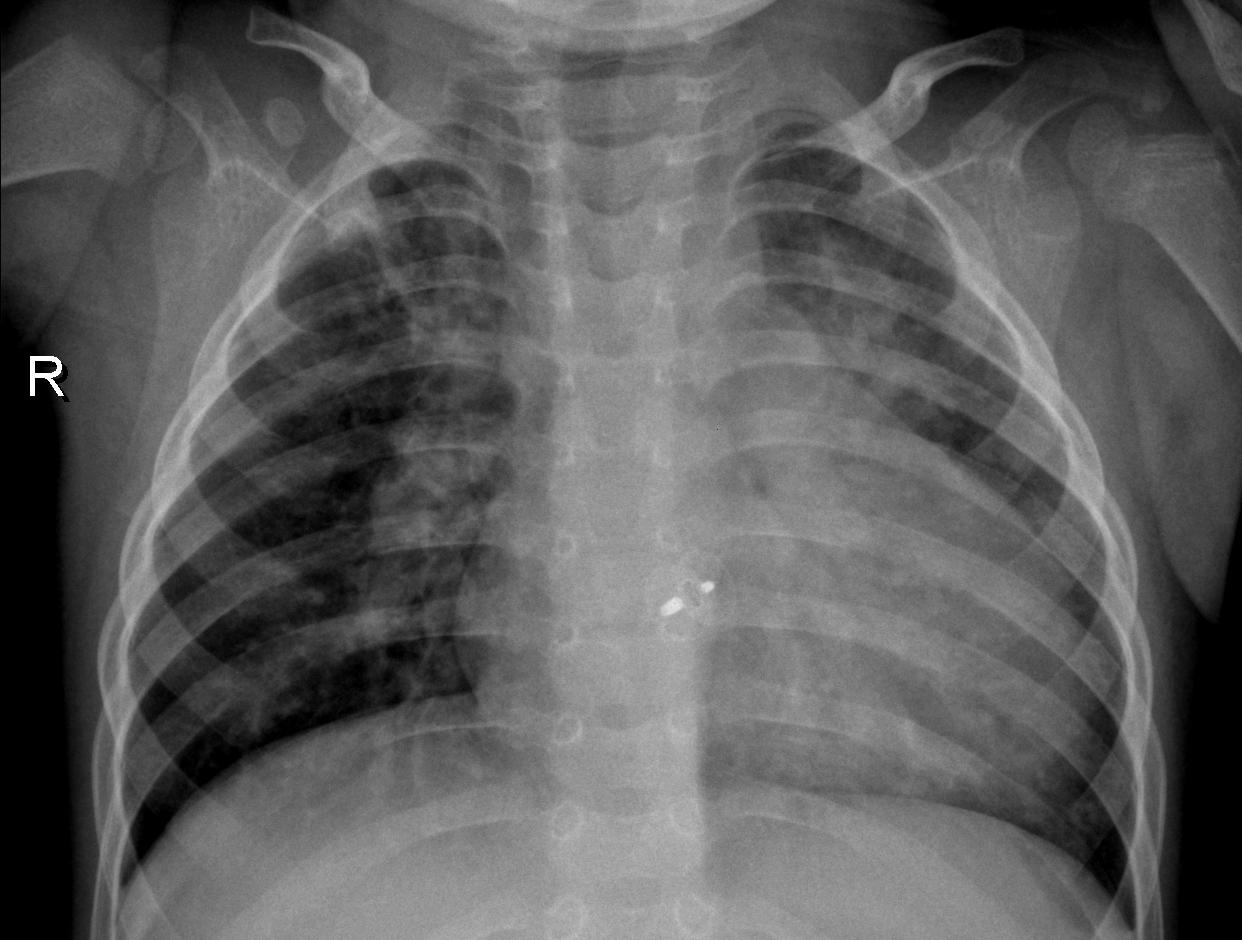

In [128]:
img_path

In [129]:
image_normal = PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0127-0001.jpeg")

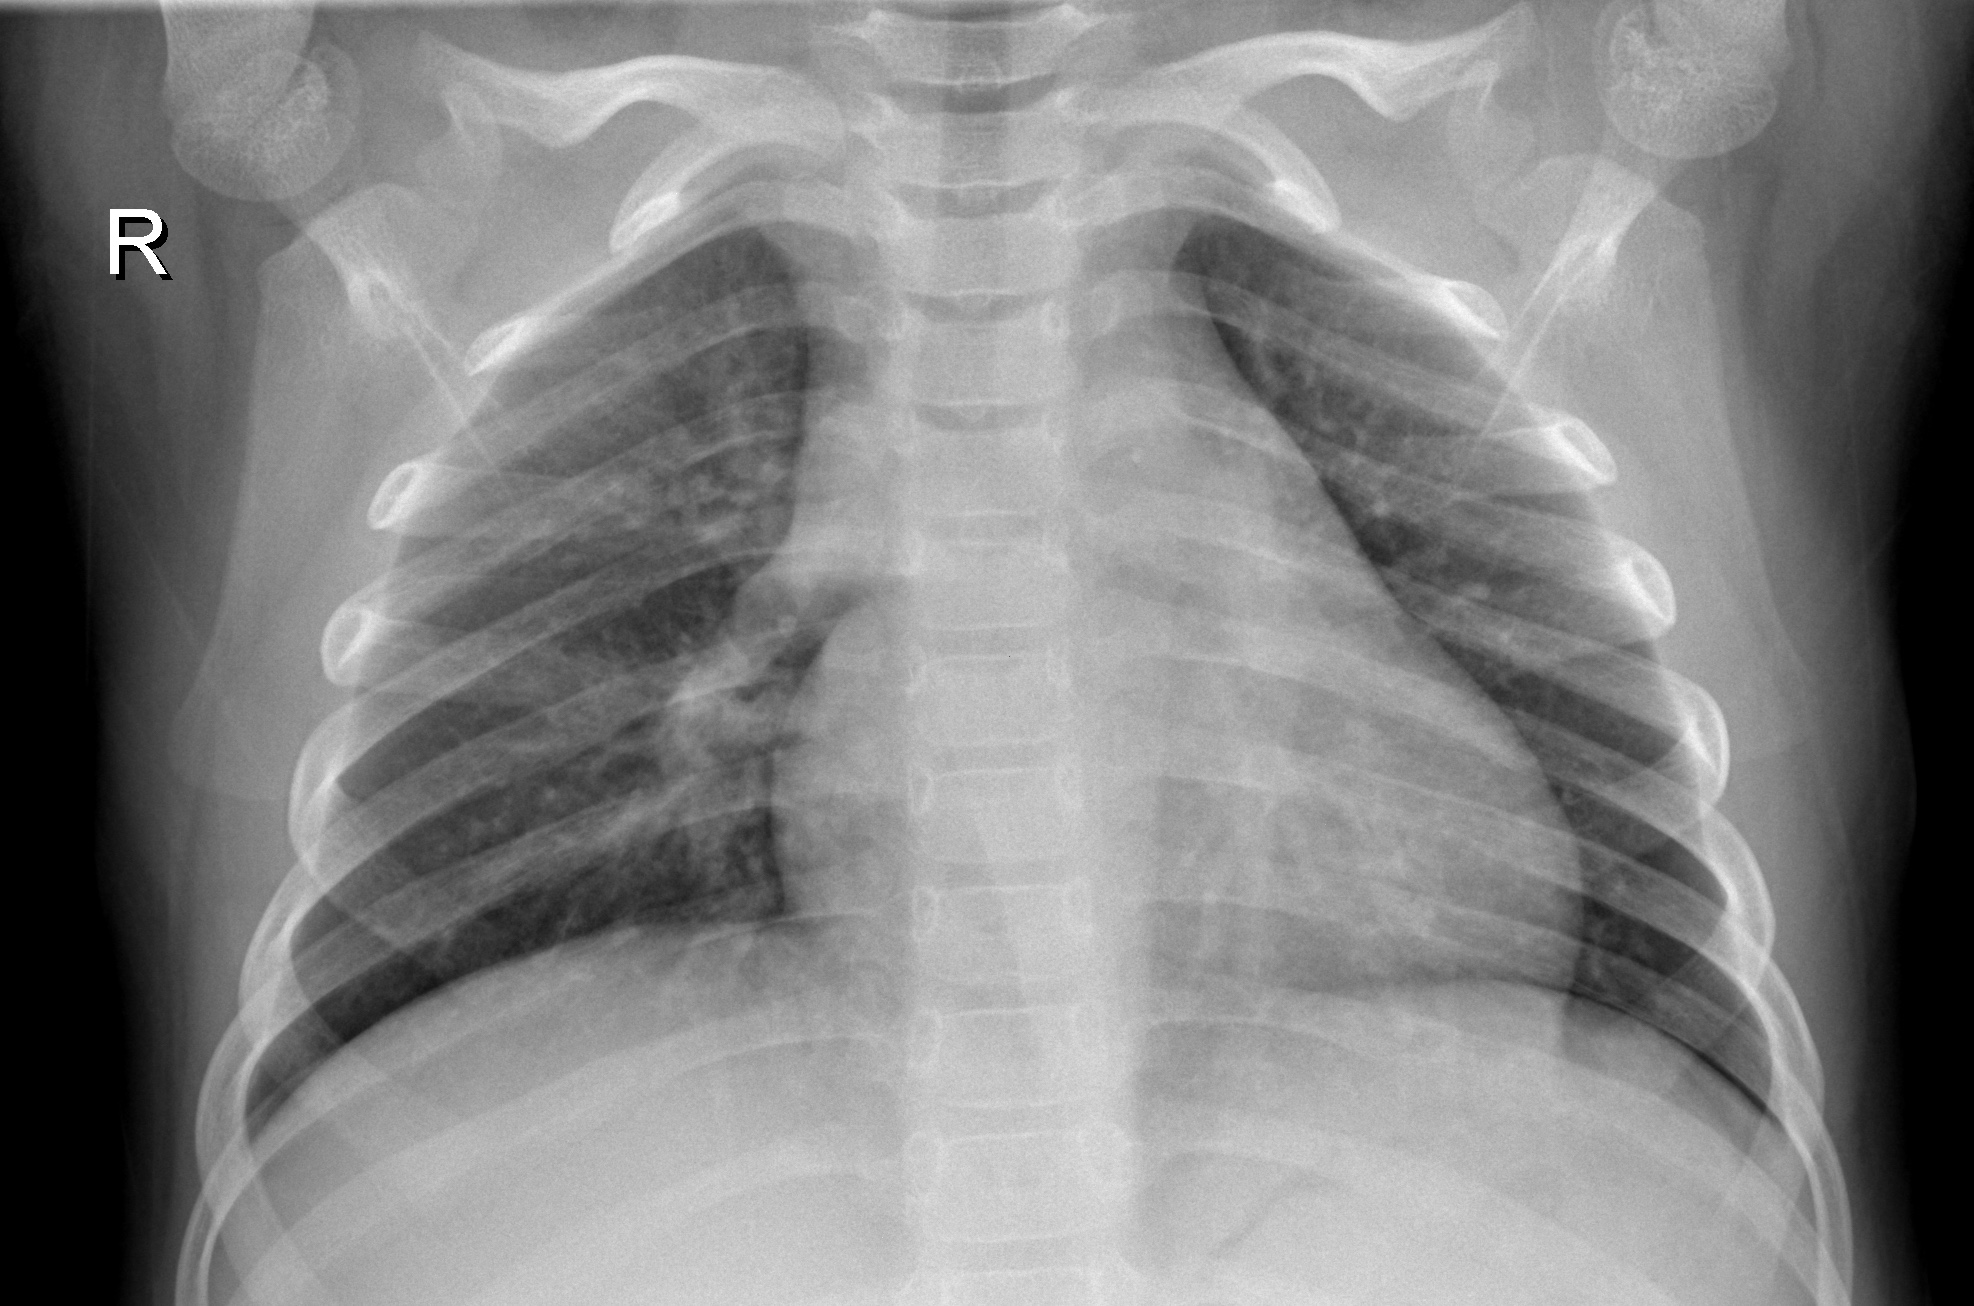

In [130]:
image_normal

In [131]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [132]:
## NORMALISATION , rescale, resize, classiafication in batch and  type of problem 

In [262]:
training_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/"
training_generator = ImageDataGenerator(rescale=1/255) # scales the pixel values so that they are in the range [0, 1]
data_train = training_generator.flow_from_directory(training_dir, target_size=(120,120), batch_size=8, class_mode="binary")
train_labels = data_train.labels

Found 5216 images belonging to 2 classes.


In [263]:
valid_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/val/"
validation_generator = ImageDataGenerator(rescale=1/255) # rescale
data_valid = validation_generator.flow_from_directory(valid_dir, target_size=(120,120) , batch_size=8, class_mode="binary") 
val_labels = data_valid.labels

Found 16 images belonging to 2 classes.


In [264]:
test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/"
test_generator = ImageDataGenerator(rescale=1/255)
data_test = test_generator.flow_from_directory(test_dir, target_size=(120,120),batch_size=8, class_mode="binary")
test_labels = data_test.labels

Found 624 images belonging to 2 classes.


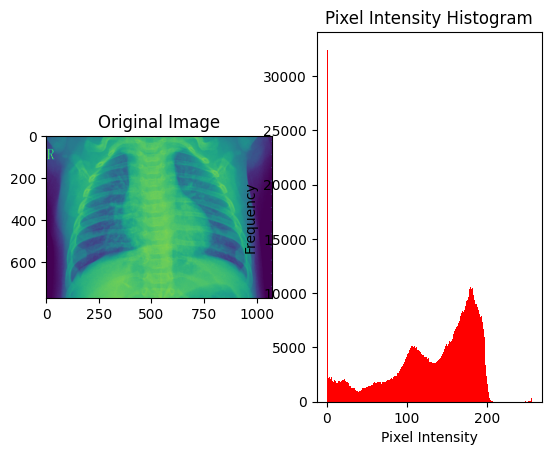

In [298]:
img_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg"
img = Image.open(img_path)
img_array = np.array(img)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Original Image')

# Plot the histogram
plt.subplot(1, 2, 2)
plt.hist(img_array.flatten(), bins=256, range=[0, 256], color='r')
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

In [ ]:
#CNN MODEL

In [328]:
model = Sequential() ##This creates a sequential model, which is a linear stack of layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3), name='conv2d_1'))  #if the input value is -ve relu returns 0, othervise the value itself
model.add(MaxPooling2D(2, 2, name='maxpooling2d_1')) ##helps in capturing the most important features while reducing computational complexity.
model.add(Conv2D(64, (3, 3), activation='relu', name='conv2d_2'))
model.add(MaxPooling2D(2, 2, name='maxpooling2d_2'))
model.add(Conv2D(128, (3, 3), activation='relu', name='conv2d_3'))
model.add(MaxPooling2D(2, 2, name='maxpooling2d_3'))
model.add(Conv2D(256, (3, 3), activation='relu', name='conv2d_4'))
model.add(MaxPooling2D(2, 2, name='maxpooling2d_4'))
model.add(Conv2D(512, (3, 3), activation='relu', name='conv2d_5'))
model.add(MaxPooling2D(2, 2, name='maxpooling2d_5'))
model.add(Flatten()) ## flattens the output from the previous layer into a one-dimensional array. Step before feeding the data into fully connected layers.
model.add(Dense(256, activation='relu', name='dense_1')) #fully connected (dense) layer with 256 neurons and a ReLU activation function.
model.add(Dense(1, activation='sigmoid', name='output')) #  sigmoid  is used for output probabilities in binary classification

In [156]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)     

In [138]:
# Output Shape: (batch_size, height, width, channels)

In [139]:
# Total params: total number of trainable parameters 
# Non-trainable params: number of parameters that are not updated during training

In [140]:
# Parameters refer to the weights and biases
# Weights are the coefficients that are multiplied with the input values during the forward pass through the network
# In a convolutional layer, each filter has its own set of weights. These weights are adjusted during training to minimize the difference between the predicted outputs and the actual targets
# Biases are added to the weighted sum of the inputs to produce the output of a neuron

In [333]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
 metrics=[
        "acc",
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='auc'),
        F1Score(num_classes=1, threshold=0.5, name='f1_score')
    ]
)
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics = ["acc"])

In [142]:
# loss : It measures the difference between the predicted probabilities and the true labels.
# The learning_rate parameter sets the step size at each iteration when moving toward a minimum of the loss function
# step size determines how much the parameters are adjusted in the direction that reduces the loss function.

In [334]:
history = model.fit_generator(
    data_train,
    epochs=3,
    validation_data=data_valid,
)

Epoch 1/3


/tmp/ipykernel_47/839874103.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


652/652 [==============================] - 100s 149ms/step - loss: 0.3916 - acc: 0.8322 - precision: 0.8436 - recall: 0.9505 - auc: 0.8491 - f1_score: 0.8938 - val_loss: 0.4232 - val_acc: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000 - val_auc: 0.9062 - val_f1_score: 0.8421
Epoch 2/3
652/652 [==============================] - 96s 147ms/step - loss: 0.1640 - acc: 0.9346 - precision: 0.9578 - recall: 0.9541 - auc: 0.9778 - f1_score: 0.9559 - val_loss: 0.8555 - val_acc: 0.6875 - val_precision: 0.6154 - val_recall: 1.0000 - val_auc: 0.9219 - val_f1_score: 0.7619
Epoch 3/3
652/652 [==============================] - 96s 148ms/step - loss: 0.1209 - acc: 0.9519 - precision: 0.9709 - recall: 0.9641 - auc: 0.9874 - f1_score: 0.9675 - val_loss: 0.7967 - val_acc: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000 - val_auc: 0.9688 - val_f1_score: 0.7273


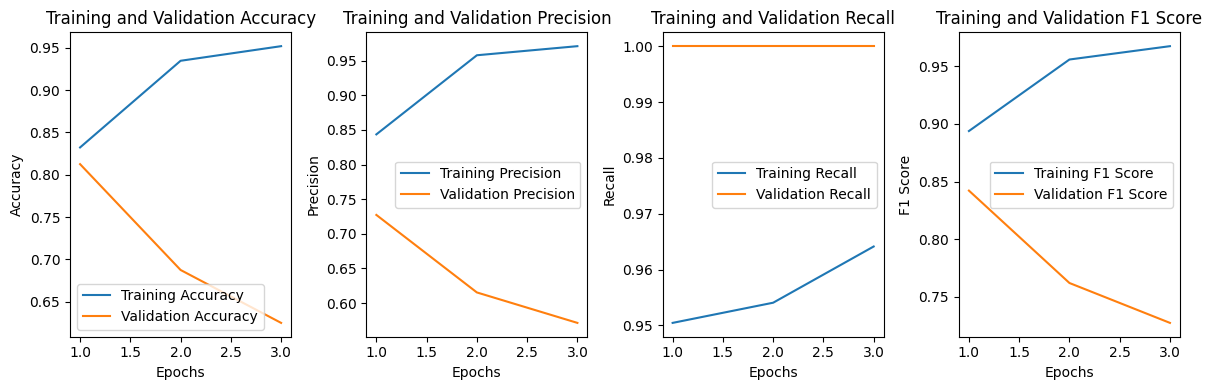

In [335]:
# Assuming you have already trained the model and have the 'history' object
train_acc = history.history['acc']
val_acc = history.history['val_acc']

train_precision = history.history['precision']
val_precision = history.history['val_precision']

train_recall = history.history['recall']
val_recall = history.history['val_recall']

train_f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']

epochs = range(1, len(train_acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot precision
plt.subplot(1, 4, 2)
plt.plot(epochs, train_precision, label='Training Precision')
plt.plot(epochs, val_precision, label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Plot recall
plt.subplot(1, 4, 3)
plt.plot(epochs, train_recall, label='Training Recall')
plt.plot(epochs, val_recall, label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# Plot F1 score
plt.subplot(1, 4, 4)
plt.plot(epochs, train_f1_score, label='Training F1 Score')
plt.plot(epochs, val_f1_score, label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [221]:
val_predictions = model.predict(data_valid)

2/2 [==============================] - 0s 117ms/step


In [229]:
conf_matrix = confusion_matrix(val_labels, (val_predictions > 0.5).astype(int))

In [336]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[1 7]
 [5 3]]


In [338]:
model.evaluate(data_test)

78/78 [==============================] - 7s 85ms/step - loss: 0.6873 - acc: 0.7516 - precision: 0.7180 - recall: 0.9923 - auc: 0.9327 - f1_score: 0.8332


[0.6872873902320862,
 0.7516025900840759,
 0.7179962992668152,
 0.9923076629638672,
 0.9326539039611816,
 array([0.8331539], dtype=float32)]

In [339]:
predictions = model.predict(data_test)

78/78 [==============================] - 7s 85ms/step


In [309]:
predictions ##probabilities

array([[1.00000000e+00],
       [1.00000000e+00],
       [8.95198226e-01],
       [9.82570346e-04],
       [3.82188857e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.70169890e-01],
       [1.00000000e+00],
       [9.99999762e-01],
       [9.73243594e-01],
       [9.99954641e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.70396817e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [7.12958992e-01],
       [1.00000000e+00],
       [3.48046713e-04],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.63536077e-04],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.61252451e-01],
       [1.00000000e+00],
       [9.50219214e-01],
       [3.83804560e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99932289e-01],
       [4.71474696e-03],


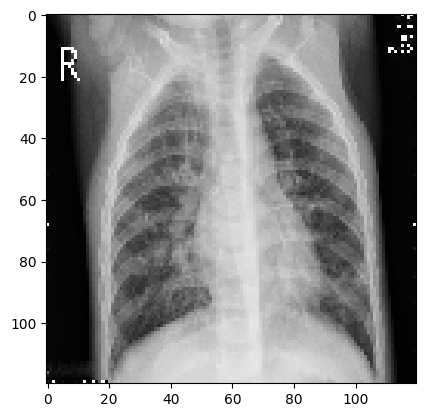

the probability of this image to have pneumonia is. :  [0.99908817]


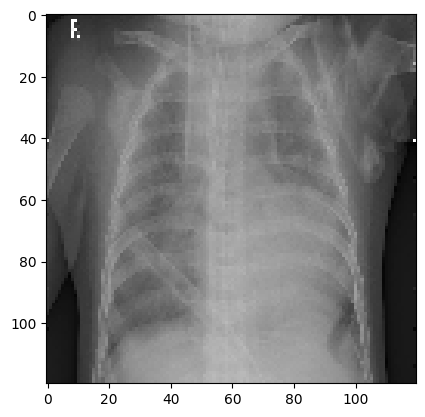

the probability of this image to have pneumonia is. :  [0.19433765]


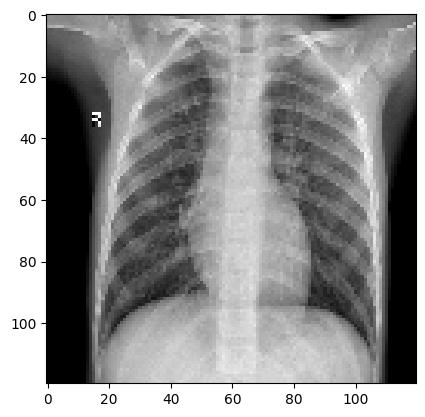

the probability of this image to have pneumonia is. :  [0.02444827]


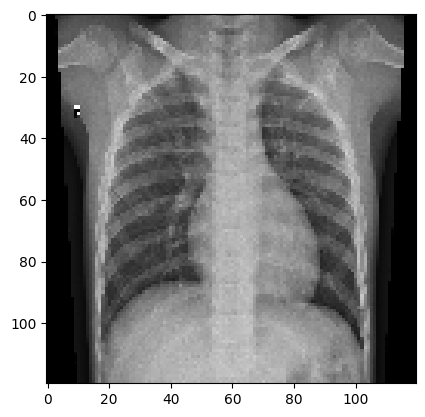

the probability of this image to have pneumonia is. :  [0.999855]


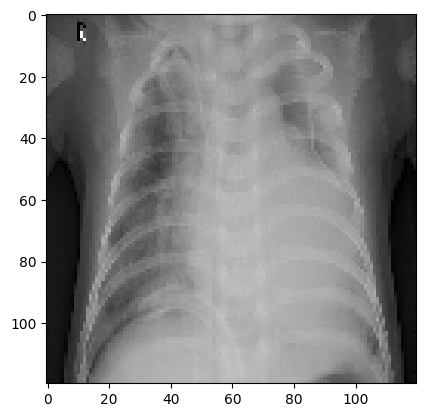

the probability of this image to have pneumonia is. :  [0.9997421]


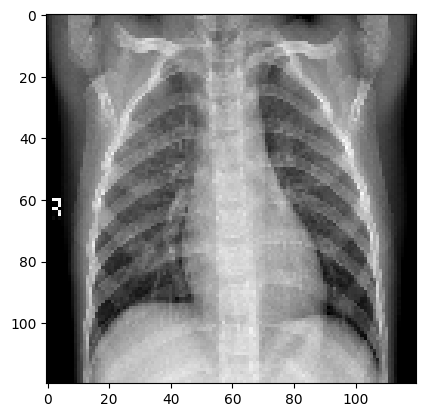

the probability of this image to have pneumonia is. :  [0.81188786]


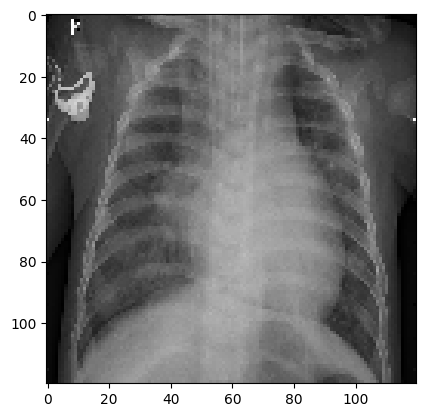

the probability of this image to have pneumonia is. :  [0.9973245]


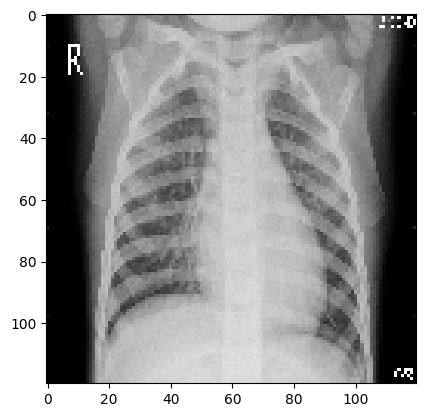

the probability of this image to have pneumonia is. :  [0.78193665]


In [340]:
x = data_test.next()
for i in range(0,1):
    image = x[i]
    for j in range(0,8):
        ## let's take 16 images for now from test folder
        plt.imshow(image[j])
        plt.show()
        print("the probability of this image to have pneumonia is. : ", predictions[j])

1/1 [==============================] - 0s 72ms/step
Shape of extracted features from 'conv2d_3': (1, 26, 26, 128)


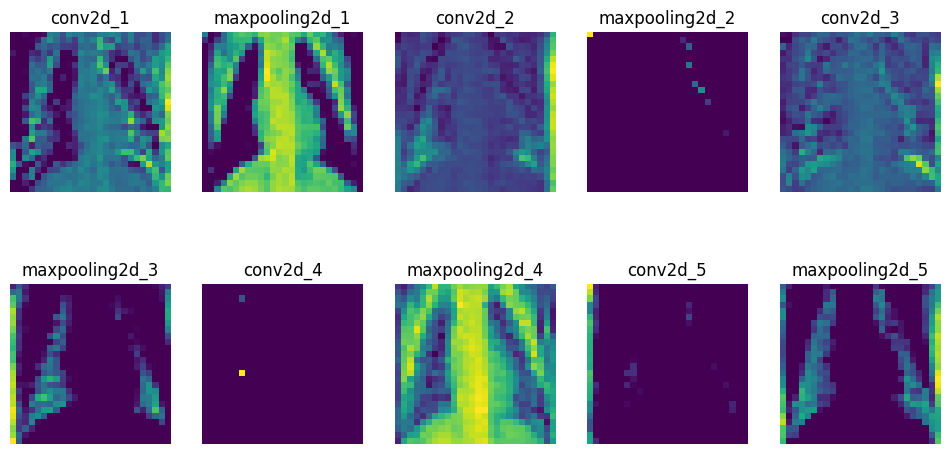

In [329]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

# Load the image from the file path
img_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg'
img = image.load_img(img_path, target_size=(120, 120))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Extract features from intermediate layers of the model
layer_names = [layer.name for layer in model.layers]
feature_extraction_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_3').output)
features = feature_extraction_model.predict(img_array)

# Print the shape of the extracted features
print("Shape of extracted features from 'conv2d_3':", features.shape)

# Plot some of the extracted features (for the first channel)
num_features_to_plot = min(features.shape[-1], 10)  # Ensure not to exceed the actual number of features
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(features[0, :, :, i], cmap='viridis')
    ax.axis('off')
    ax.set_title(layer_names[i])

plt.show()
